# ⚡ Concurrent Agent Workflows with GitHub Models (Python)

## 📋 Advanced Parallel Processing Tutorial

This notebook demonstrates **concurrent workflow patterns** using the Microsoft Agent Framework. You'll learn how to build high-performance, parallel processing workflows where multiple AI agents execute simultaneously, dramatically improving throughput and enabling sophisticated multi-threaded business processes.

## 🎯 Learning Objectives

### 🚀 **Concurrent Processing Fundamentals**
- **Parallel Agent Execution**: Run multiple agents simultaneously for maximum efficiency
- **Workflow Orchestration**: Coordinate concurrent operations while maintaining data consistency
- **Performance Optimization**: Achieve significant speedup through parallel processing
- **Resource Management**: Efficiently utilize AI model resources across concurrent operations

### 🏗️ **Advanced Concurrency Patterns**
- **Fork-Join Processing**: Split work across multiple agents and merge results
- **Pipeline Parallelism**: Overlapping execution stages for continuous throughput
- **Load Balancing**: Distribute work evenly across available agent resources
- **Synchronization Points**: Coordinate concurrent agents at critical workflow stages

### 🏢 **Enterprise Concurrent Applications**
- **High-Volume Document Processing**: Process multiple documents simultaneously
- **Real-Time Content Analysis**: Concurrent analysis of incoming data streams
- **Batch Processing Optimization**: Maximize throughput for large-scale operations
- **Multi-Modal Analysis**: Parallel processing of different content types (text, images, data)

## ⚙️ Prerequisites & Setup

### 📦 **Required Dependencies**

Install Agent Framework with concurrent workflow capabilities:

```bash
# Remove any conflicting installations
pip uninstall agent-framework-core -y
pip uninstall agent-framework-azure-ai -y

# Install latest version with advanced workflow support
pip install -r ../../../Installation/requirements.txt -U
```

### 🔑 **GitHub Models Configuration**

**Environment Setup (.env file):**
```env
GITHUB_TOKEN=your_github_personal_access_token
GITHUB_ENDPOINT=https://models.inference.ai.azure.com
GITHUB_MODEL_ID=gpt-4o-mini
```

**Concurrent Processing Considerations:**
- **Rate Limits**: Monitor GitHub Models API rate limits for concurrent requests
- **Resource Usage**: Consider memory and CPU usage with multiple concurrent agents
- **Error Handling**: Implement robust error recovery for parallel operations

### 🏗️ **Concurrent Workflow Architecture**

```mermaid
graph TD
    A[Workflow Start] --> B[Concurrent Execution]
    B --> C[Agent Pool 1]
    B --> D[Agent Pool 2]
    B --> E[Agent Pool 3]
    C --> F[Result Aggregation]
    D --> F
    E --> F
    F --> G[Final Output]
    
    H[GitHub Models API] --> C
    H --> D
    H --> E
```

**Key Benefits:**
- **⚡ Performance**: Significant speedup through parallel execution
- **📈 Scalability**: Handle increased workloads without proportional time increase
- **🔄 Efficiency**: Better utilization of available computational resources
- **🎯 Throughput**: Process more work in the same amount of time

## 🎨 **Concurrent Workflow Design Patterns**

### 🔍 **Research & Analysis Pipeline**
```
Research Task → Parallel Research Agents → Content Synthesis → Quality Review
```

### 📊 **Data Processing Workflow**
```
Input Data → Concurrent Processing Agents → Result Aggregation → Final Report
```

### 🎭 **Content Creation Pipeline**
```
Content Brief → Parallel Content Generators → Review & Merge → Final Content
```

### 🔄 **Multi-Stage Processing**
```
Input → Stage 1 (Concurrent) → Stage 2 (Concurrent) → Stage 3 (Sequential) → Output
```

## 🏢 **Enterprise Performance Benefits**

### ⚡ **Throughput Optimization**
- **Parallel Execution**: Multiple agents working simultaneously
- **Resource Utilization**: Maximum efficiency of available AI model capacity
- **Time Reduction**: Significant decrease in total processing time
- **Scalable Architecture**: Easily add more concurrent agents as needed

### 🛡️ **Reliability & Resilience**
- **Fault Tolerance**: Individual agent failures don't stop the entire workflow
- **Error Isolation**: Problems in one concurrent branch don't affect others
- **Graceful Degradation**: System continues operating even with reduced agent capacity
- **Recovery Mechanisms**: Automatic retry and error handling for failed operations

### 📊 **Monitoring & Observability**
- **Concurrent Execution Tracking**: Monitor progress of all parallel operations
- **Performance Metrics**: Measure speedup and efficiency gains
- **Resource Usage Analytics**: Optimize concurrent agent allocation
- **Bottleneck Identification**: Find and resolve performance constraints

Let's build high-performance concurrent AI workflows! 🚀

In [1]:
import os
from typing import Any

from agent_framework import ChatMessage, ConcurrentBuilder,WorkflowViz
from agent_framework.openai import OpenAIChatClient

In [2]:
chat_client = OpenAIChatClient(base_url=os.environ.get("GITHUB_ENDPOINT"), api_key=os.environ.get("GITHUB_TOKEN"), ai_model_id="gpt-4o" )

In [3]:
ResearcherAgentName = "Researcher-Agent"
ResearcherAgentInstructions = "You are my travel researcher, working with me to analyze the destination, list relevant attractions, and make detailed plans for each attraction."

In [4]:
PlanAgentName = "Plan-Agent"
PlanAgentInstructions = "You are my travel planner, working with me to create a detailed travel plan based on the researcher's findings."

In [5]:
research_agent   = chat_client.create_agent(
        instructions=(
           ResearcherAgentInstructions
        ),
        name=ResearcherAgentName,
    )

plan_agent = chat_client.create_agent(
        instructions=(
            PlanAgentInstructions
        ),
        name=PlanAgentName,
    )

In [6]:
workflow = ConcurrentBuilder().participants([research_agent, plan_agent]).build()

In [7]:
print("Generating workflow visualization...")
viz = WorkflowViz(workflow)
# Print out the mermaid string.
print("Mermaid string: \n=======")
print(viz.to_mermaid())
print("=======")
# Print out the DiGraph string.
print("DiGraph string: \n=======")
print(viz.to_digraph())
print("=======")
svg_file = viz.export(format="svg")
print(f"SVG file saved to: {svg_file}")

Generating workflow visualization...
Mermaid string: 
flowchart TD
  dispatcher["dispatcher (Start)"];
  Researcher_Agent["Researcher-Agent"];
  Plan_Agent["Plan-Agent"];
  aggregator["aggregator"];
  fan_in__aggregator__69d73de8((fan-in))
  Plan_Agent --> fan_in__aggregator__69d73de8;
  Researcher_Agent --> fan_in__aggregator__69d73de8;
  fan_in__aggregator__69d73de8 --> aggregator;
  dispatcher --> Researcher_Agent;
  dispatcher --> Plan_Agent;
DiGraph string: 
digraph Workflow {
  rankdir=TD;
  node [shape=box, style=filled, fillcolor=lightblue];
  edge [color=black, arrowhead=vee];

  "dispatcher" [fillcolor=lightgreen, label="dispatcher\n(Start)"];
  "Researcher-Agent" [label="Researcher-Agent"];
  "Plan-Agent" [label="Plan-Agent"];
  "aggregator" [label="aggregator"];

  "fan_in::aggregator::69d73de8" [shape=ellipse, fillcolor=lightgoldenrod, label="fan-in"];
  "Plan-Agent" -> "fan_in::aggregator::69d73de8";
  "Researcher-Agent" -> "fan_in::aggregator::69d73de8";
  "fan_in::aggre

Attempting to display SVG file at: C:\Users\kinfeylo\AppData\Local\Temp\tmpqsag7pcb.svg


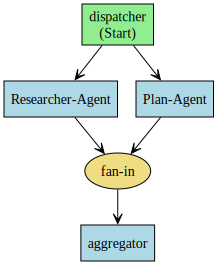

In [8]:
from IPython.display import SVG, display, HTML
import os

print(f"Attempting to display SVG file at: {svg_file}")

if svg_file and os.path.exists(svg_file):
    try:
        # Preferred: direct SVG rendering
        display(SVG(filename=svg_file))
    except Exception as e:
        print(f"⚠️ Direct SVG render failed: {e}. Falling back to raw HTML.")
        try:
            with open(svg_file, "r", encoding="utf-8") as f:
                svg_text = f.read()
            display(HTML(svg_text))
        except Exception as inner:
            print(f"❌ Fallback HTML render also failed: {inner}")
else:
    print("❌ SVG file not found. Ensure viz.export(format='svg') ran successfully.")

In [9]:
events = await workflow.run("Plan a trip to Seattle in December")
outputs = events.get_outputs()

In [10]:
if outputs:
        print("===== Final Aggregated Conversation (messages) =====")
        for output in outputs:
            messages: list[ChatMessage] | Any = output
            for i, msg in enumerate(messages, start=1):
                name = msg.author_name if msg.author_name else "user"
                print(f"{'-' * 60}\n\n{i:02d} [{name}]:\n{msg.text}")

===== Final Aggregated Conversation (messages) =====
------------------------------------------------------------

01 [user]:
Plan a trip to Seattle in December
------------------------------------------------------------

02 [Researcher-Agent]:
Certainly! Let’s plan a fantastic winter trip to **Seattle, Washington**, this December. Seattle is beautiful in December, with festive lights, cozy coffee shops, and seasonal events. Although the weather tends to be chilly (temperatures usually between 35–45°F with possible rain), Seattle offers an abundance of indoor and outdoor activities that make it an attractive destination.

---

### **Key Highlights of the Trip**
- Duration: 4–5 days (can be adjusted to your preference)
- Theme: History, culture, local food, and winter festivities
- Expectation: Moderate walking, layered clothing, and a raincoat/umbrella

---

### **Top Attractions to Include**
1. **Pike Place Market**
2. **Space Needle**
3. **Chihuly Garden and Glass**
4. **Museum of P